In lab 1 we decide to select a data set named fashion amnist which had the images and it was image processing after discussion with the lab tutor marco we decided to change the data set . we decide to change to wine dataset.

In [2]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request 
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


#classification
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Archit26/SampleDataSet/main/wines_SPA.csv")

In [4]:
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [6]:
df["region"].value_counts()


Rioja                              2440
Ribera del Duero                   1413
Priorato                            686
Toro                                300
Vino de Espana                      263
                                   ... 
Ribera del Gallego-Cinco Villas       1
Monterrei                             1
Jerez Cream                           1
Condado de Huelva                     1
Abona                                 1
Name: region, Length: 76, dtype: int64

In [7]:
df.describe()

,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,4.254933,451.109067,60.095822,4.158427,2.946612
std,0.118029,723.001856,150.356676,0.583352,0.248202
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,389.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.530000,4.000000,3.000000
75%,4.200000,415.000000,51.350000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [8]:
wines_by_region_df = df.groupby(['region'])

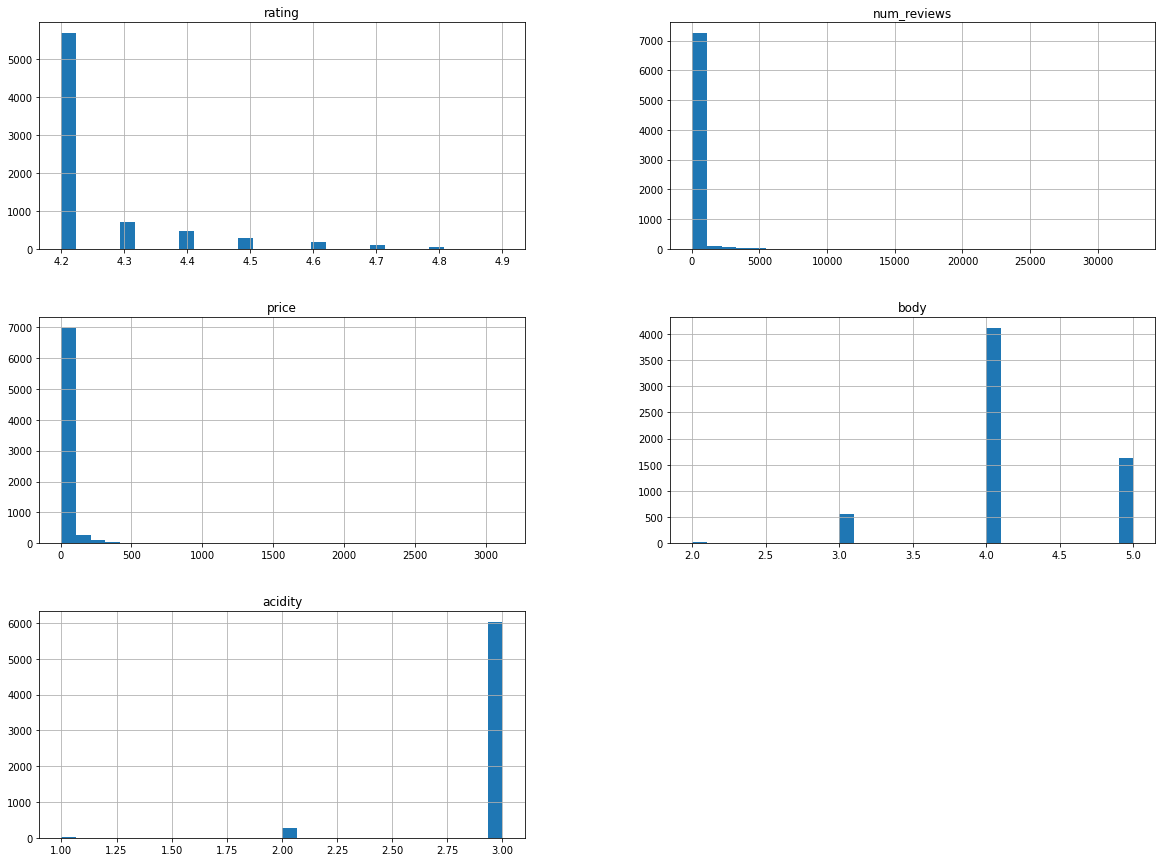

In [9]:
#To plot a histogram for each numerical attribute
df.hist(bins=30, figsize=(20,15))
plt.show()

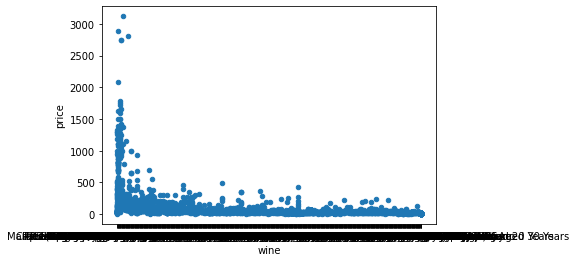

In [10]:
# Q5 Now you will plot 3 different variations of the data, which one is more indicative and why?
df.plot(kind="scatter", x="wine", y="price")


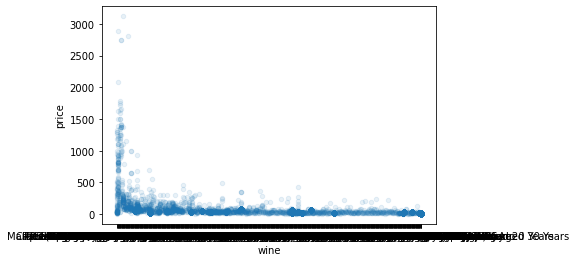

In [11]:
df.plot(kind="scatter", x="wine", y="price",alpha=0.1)

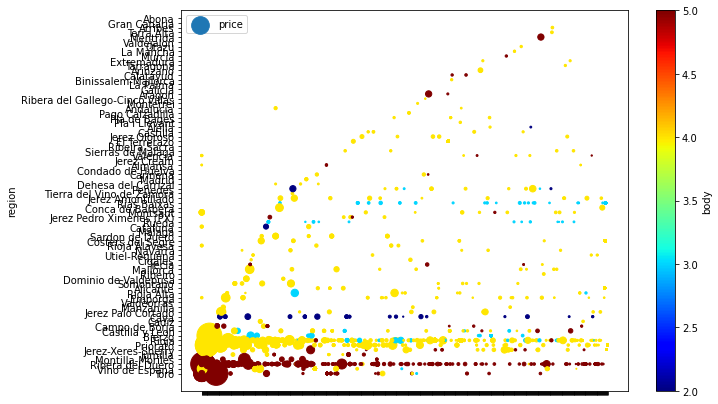

In [12]:
df.plot(kind="scatter", x="wine", y="region",
    s=df["price"]/5, label="price", figsize=(10,7),
    c="body", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
# plots California housing prices:red is expensive, blue is cheap. Large circles indicate areas with larger populations.
# The radius of each circle represents the district’s population(option s) and the color represents the price (option c). 


In [16]:
# Now we will look at the correlation of all the attributes with the expected class attribute (median-house-value)
corr_matrix = df.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes

In [15]:
corr_matrix["price"].sort_values(ascending=False)
# Q6 Which are the most correlated attributes with the output variable(i.e.median house value)?
# Does that make sense? 

price          1.000000
rating         0.544809
body           0.153624
num_reviews   -0.030083
acidity       -0.032870
Name: price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3260ea6340>,
      dtype=object)

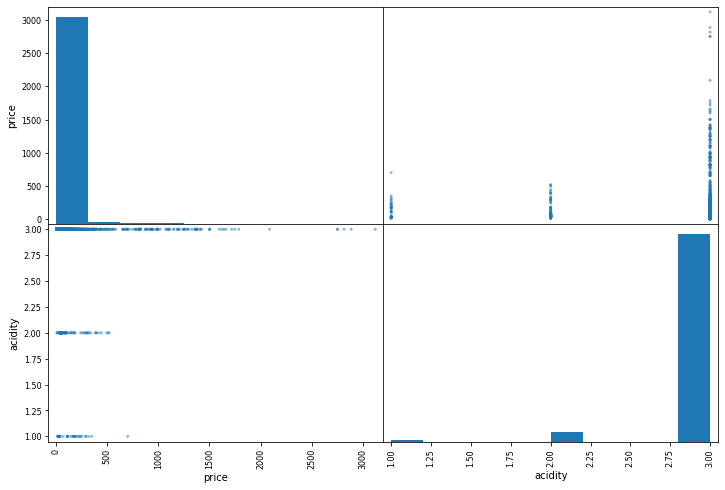

In [17]:
from pandas.plotting import scatter_matrix

attributes = ["price", "wine", "region",
              "acidity"]
scatter_matrix(df[attributes], figsize=(12, 8))
# Another way to check for correlation between attributes is to use the pandas scatter_matrix() function above
# Here we choose to plot 4 promising  numerical attributes against each other

(0.0, 16.0, 0.0, 550.0)

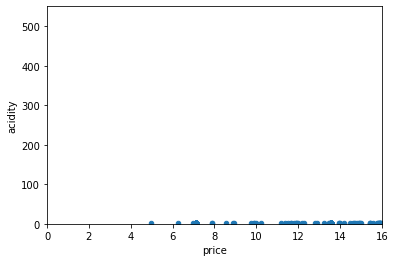

In [18]:
# let’s zoom in on the correlation scatterplot "median house value & the median income,"
df.plot(kind="scatter", x="price", y="acidity")
plt.axis([0, 16, 0, 550])
#Q7 Describe the plot below. What does this indicate? Do you have an explanation for the solid line?

In [19]:
corr_matrix = df.corr()
corr_matrix["acidity"].sort_values(ascending=False)
# Now you are checking the correlations given the new features 
# Q9 Did you get better features ?

acidity        1.000000
num_reviews    0.040138
body          -0.017950
price         -0.032870
rating        -0.094553
Name: acidity, dtype: float64

In [20]:
#housing_labels = housing["median_house_value"].copy()
#housing = housing.drop("median_house_value", axis=1)  # drop the target label as we dont wan
# Now you will start by looking at your missing values
# First revert back to the original data set by dropping the new features  
#df = df.drop("total_estimated_sales", axis=1)  
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [21]:
sample_incomplete_rows = df[df.isnull().any(axis=1)].head()
sample_incomplete_rows   # display rows with missing values

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
46,Vega Sicilia,Unico Reserva Especial Edicion,NaN,4.7,12421,Espana,Ribera del Duero,423.50000,Ribera Del Duero Red,5.0,3.0
120,Finca Moncloa,Tintilla de Rota,2016,4.7,92,Espana,Cadiz,43.13000,NaN,NaN,NaN
147,Rafael Palacios,Sorte O Soro Val do Bibei,2019,4.7,37,Espana,Valdeorras,194.86000,NaN,NaN,NaN
156,Gutierrez de la Vega,Recondita Armonia Monastrell Dulce,1987,4.7,27,Espana,Alicante,81.90000,NaN,NaN,NaN
254,Costers del Siurana,Dolc de L'Obac,2006,4.6,94,Espana,Priorato,117.23942,NaN,NaN,NaN


In [22]:
# option 1 Remove the records (i.e rows ) with missing values.
sample_incomplete_rows.dropna(subset=["acidity"])  
#Q12 What is displayed below? Note your observation 

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
46,Vega Sicilia,Unico Reserva Especial Edicion,NaN,4.7,12421,Espana,Ribera del Duero,423.5,Ribera Del Duero Red,5.0,3.0


In [23]:
sample_incomplete_rows.drop("acidity", axis=1)        # option 2 Remove the entire attribute with the missing value
#Q13  What do you see now? How is this different from your observation in Q12

,winery,wine,year,rating,num_reviews,country,region,price,type,body
46,Vega Sicilia,Unico Reserva Especial Edicion,NaN,4.7,12421,Espana,Ribera del Duero,423.50000,Ribera Del Duero Red,5.0
120,Finca Moncloa,Tintilla de Rota,2016,4.7,92,Espana,Cadiz,43.13000,NaN,NaN
147,Rafael Palacios,Sorte O Soro Val do Bibei,2019,4.7,37,Espana,Valdeorras,194.86000,NaN,NaN
156,Gutierrez de la Vega,Recondita Armonia Monastrell Dulce,1987,4.7,27,Espana,Alicante,81.90000,NaN,NaN
254,Costers del Siurana,Dolc de L'Obac,2006,4.6,94,Espana,Priorato,117.23942,NaN,NaN


In [26]:
median = df["acidity"].median() # calculate the median of total_bedrooms
sample_incomplete_rows["acidity"].fillna(median, inplace=True) # option 3 Fill missing value with  median
# Q14 Note your observation in the displayed rows below. How is it different from Q12 and Q13

In [27]:
median = df["acidity"].median() # calculate the median of total_bedrooms
sample_incomplete_rows["acidity"].fillna(median, inplace=True) # option 3 Fill missing value with  median
# Q14 Note your observation in the displayed rows below. How is it different from Q12 and Q13

In [30]:
from sklearn.impute import SimpleImputer      # Look up SimpleImputer Class in Sklearn Documenation
imputer = SimpleImputer(strategy="median")    # Replace each missing attribute with median of that attribute 

In [31]:
#We cant compute the median of a categorical data, therefore we are creating a copy of the data without ocean_prox
dp = df.drop("wine", axis=1) 

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['wine']=le.fit_transform(df['wine'])
df['winery']=le.fit_transform(df['winery'])
df['country']=le.fit_transform(df['country'])
df['type']=le.fit_transform(df['type'])
df['region']=le.fit_transform(df['region'])
#df.head()
df.tail()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
7495,159,619,2016,4.2,392,0,59,19.98,12,4.0,3.0
7496,158,440,2018,4.2,390,0,53,16.76,9,4.0,3.0
7497,334,302,2017,4.2,390,0,24,24.45,10,4.0,3.0
7498,316,342,2011,4.2,389,0,57,64.50,11,5.0,3.0
7499,406,596,2016,4.2,388,0,57,31.63,11,5.0,3.0


In [33]:
df.median().values #Check that this is the same as manually computing the median of each attribute

<ipython-input-33-12846049c682>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median().values #Check that this is the same as manually computing the median of each attribute


array([285.  , 496.  ,   4.2 , 404.  ,   0.  ,  57.  ,  28.53,  12.  ,
         4.  ,   3.  ])

LAB 3


In [34]:
features = ['winery','wine','rating','num_reviews','country', 'region', 'type', 'body', 'acidity']
X = df.loc[:, features]
y = df.loc[:, ['price']]
df.head(10)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,422,759,2013,4.9,58,0,69,995.00,19,5.0,3.0
1,33,819,2018,4.9,31,0,74,313.50,18,4.0,2.0
2,447,778,2009,4.8,1793,0,57,324.95,11,5.0,3.0
3,447,778,1999,4.8,1705,0,57,692.96,11,5.0,3.0
4,447,778,1996,4.8,1309,0,57,778.06,11,5.0,3.0
5,447,778,1998,4.8,1209,0,57,490.00,11,5.0,3.0
6,447,778,2010,4.8,1201,0,57,349.00,11,5.0,3.0
7,447,778,1995,4.8,926,0,57,810.89,11,5.0,3.0
8,447,779,2015,4.8,643,0,57,345.00,11,5.0,3.0
9,447,778,2011,4.8,630,0,57,315.00,11,5.0,3.0


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .70)

In [37]:
y_test.head(10)


,price
1563,348.85
5333,37.90
7424,31.63
6731,17.90
4178,28.30
6804,28.30
3018,61.94
6317,27.89
3323,31.63
1933,19.40


In [39]:
print(f"No. of training examples: {X_train.shape}")
print(f"No. of testing examples: {y_test.shape[0]}")

print(f"No. of training examples: {X_train.shape[0]}")
print(f"No. of testing examples: {y_test.shape[0]}")

No. of training examples: (5250, 9)
No. of testing examples: 2250
No. of training examples: 5250
No. of testing examples: 2250


In [40]:
X_test.shape

(2250, 9)

In [41]:
y_train.shape

(5250, 1)

after this we started establishing corelation between attributes

In [42]:
df_matrix=X_train.corr()
df_matrix

,winery,wine,rating,num_reviews,country,region,type,body,acidity
winery,1.000000,-0.159089,-0.039898,-0.010393,NaN,0.046135,-0.120330,0.090017,0.257437
wine,-0.159089,1.000000,0.047778,0.075265,NaN,0.170212,0.154809,-0.021103,-0.185706
rating,-0.039898,0.047778,1.000000,0.022764,NaN,0.050553,-0.021021,0.156913,-0.069724
num_reviews,-0.010393,0.075265,0.022764,1.000000,NaN,0.053048,-0.002607,0.057997,0.036373
country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,0.046135,0.170212,0.050553,0.053048,NaN,1.000000,0.280526,0.341874,-0.174459
type,-0.120330,0.154809,-0.021021,-0.002607,NaN,0.280526,1.000000,0.405727,-0.291161
body,0.090017,-0.021103,0.156913,0.057997,NaN,0.341874,0.405727,1.000000,-0.011578
acidity,0.257437,-0.185706,-0.069724,0.036373,NaN,-0.174459,-0.291161,-0.011578,1.000000


In [43]:
df = df_matrix.drop("country", axis=1)
df.head()

,winery,wine,rating,num_reviews,region,type,body,acidity
winery,1.000000,-0.159089,-0.039898,-0.010393,0.046135,-0.120330,0.090017,0.257437
wine,-0.159089,1.000000,0.047778,0.075265,0.170212,0.154809,-0.021103,-0.185706
rating,-0.039898,0.047778,1.000000,0.022764,0.050553,-0.021021,0.156913,-0.069724
num_reviews,-0.010393,0.075265,0.022764,1.000000,0.053048,-0.002607,0.057997,0.036373
country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
corr_matrix['rating'].sort_values(ascending=False)

rating         1.000000
price          0.544809
body           0.163033
num_reviews    0.015229
acidity       -0.094553
Name: rating, dtype: float64

In [45]:
corr_matrix['price'].sort_values(ascending=False)

price          1.000000
rating         0.544809
body           0.153624
num_reviews   -0.030083
acidity       -0.032870
Name: price, dtype: float64

In [46]:
corr_matrix['acidity'].sort_values(ascending=False)

acidity        1.000000
num_reviews    0.040138
body          -0.017950
price         -0.032870
rating        -0.094553
Name: acidity, dtype: float64

In [47]:
df1 = X_train.drop(['num_reviews','acidity'], axis=1)
df1.head()

,winery,wine,rating,country,region,type,body
5365,383,496,4.2,0,59,12,4.0
4341,317,260,4.2,0,69,19,5.0
7481,285,56,4.2,0,8,5,3.0
2731,292,639,4.2,0,54,0,3.0
1511,280,421,4.3,0,37,21,NaN


In [48]:
df2=X_train.drop(['acidity'],axis=1)
df2.head()

,winery,wine,rating,num_reviews,country,region,type,body
5365,383,496,4.2,402,0,59,12,4.0
4341,317,260,4.2,400,0,69,19,5.0
7481,285,56,4.2,415,0,8,5,3.0
2731,292,639,4.2,414,0,54,0,3.0
1511,280,421,4.3,94,0,37,21,NaN


In [49]:
df3 = X_train.drop(['rating'], axis=1)
df3.head()

,winery,wine,num_reviews,country,region,type,body,acidity
5365,383,496,402,0,59,12,4.0,3.0
4341,317,260,400,0,69,19,5.0,3.0
7481,285,56,415,0,8,5,3.0,3.0
2731,292,639,414,0,54,0,3.0,3.0
1511,280,421,94,0,37,21,NaN,NaN


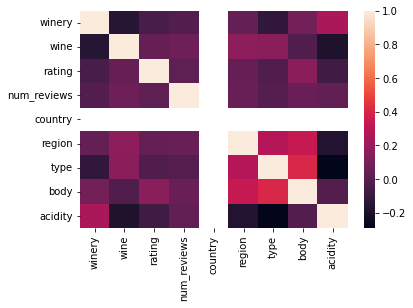

In [50]:
##correlation map
import seaborn as sns

sns.heatmap(df_matrix)
plt.show()

In [51]:
df_matrix.columns


Index(['winery', 'wine', 'rating', 'num_reviews', 'country', 'region', 'type',
       'body', 'acidity'],
      dtype='object')

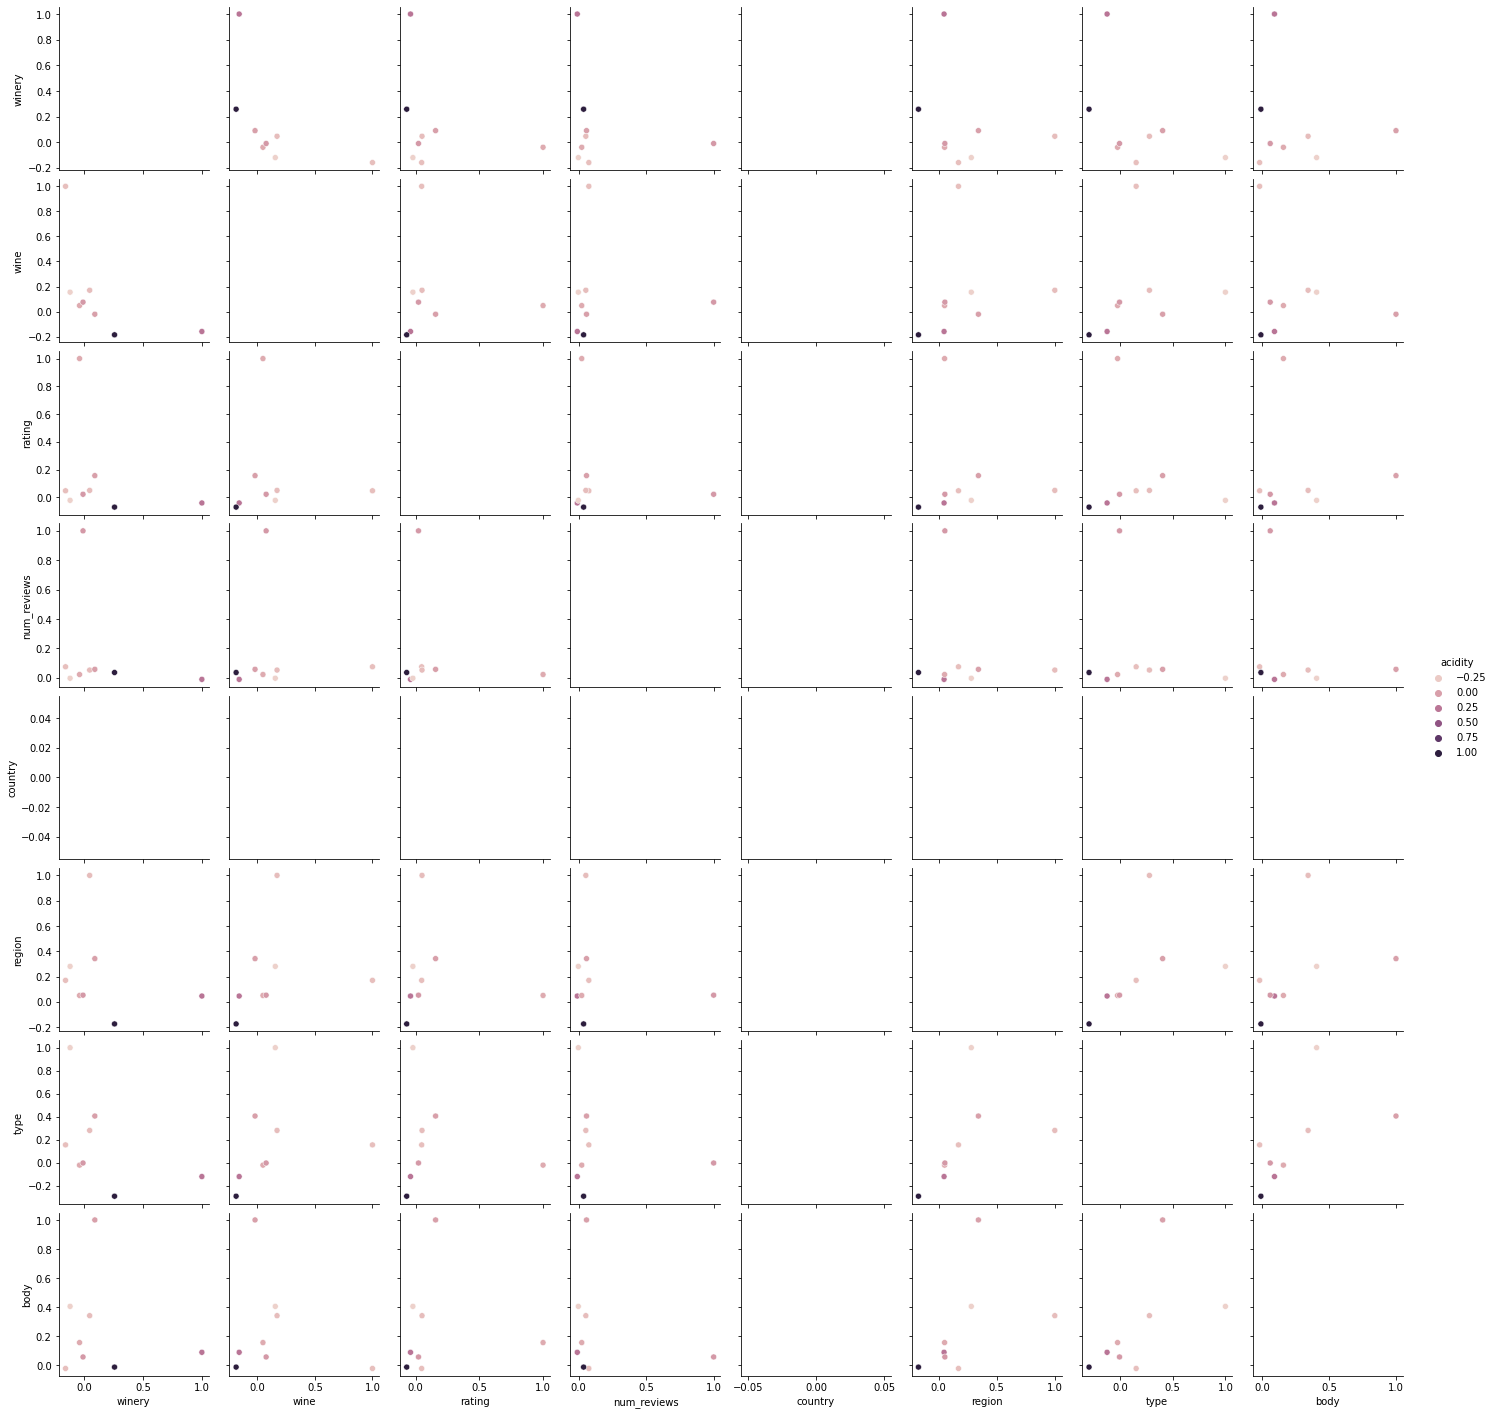

In [52]:
sns.pairplot(df_matrix, hue="acidity")

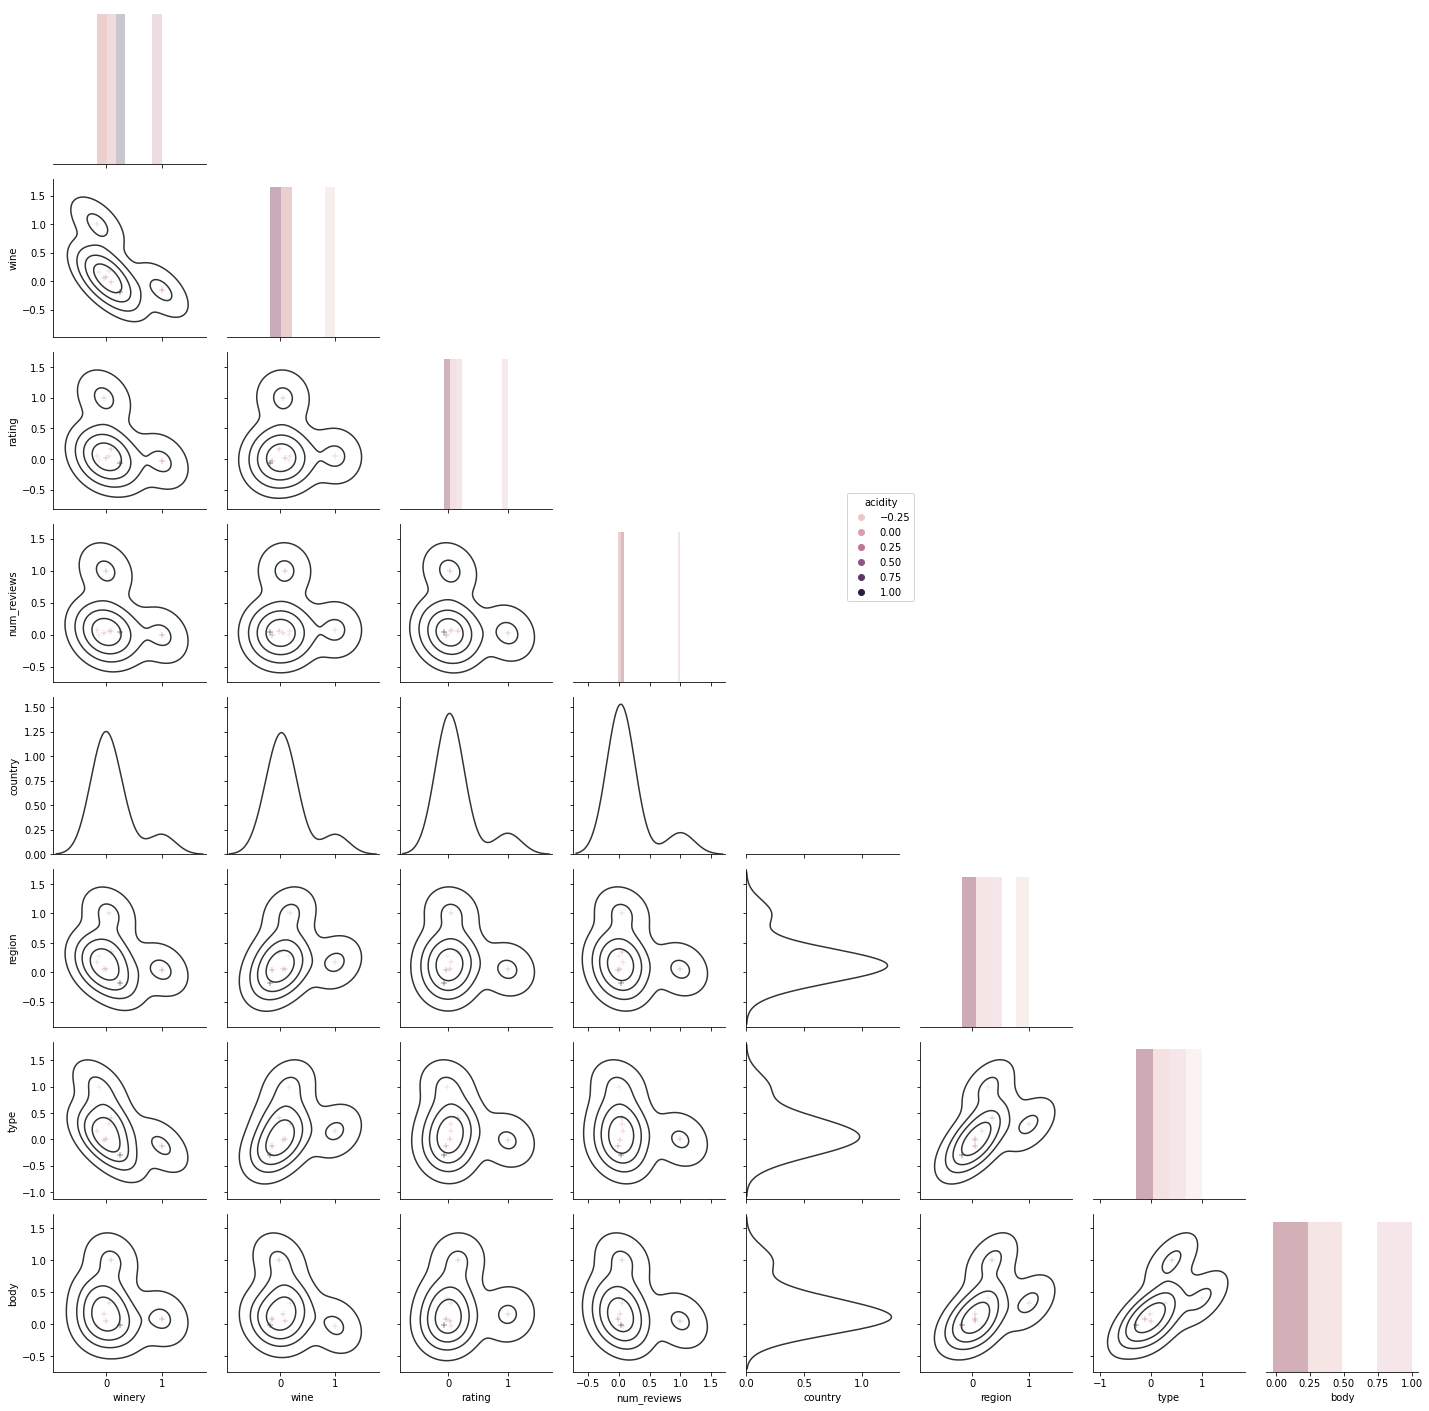

In [53]:
g = sns.PairGrid(df_matrix, hue="acidity", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

In [54]:
df_matrix.fillna(df_matrix.mean())

,winery,wine,rating,num_reviews,country,region,type,body,acidity
winery,1.000000,-0.159089,-0.039898,-0.010393,NaN,0.046135,-0.120330,0.090017,0.257437
wine,-0.159089,1.000000,0.047778,0.075265,NaN,0.170212,0.154809,-0.021103,-0.185706
rating,-0.039898,0.047778,1.000000,0.022764,NaN,0.050553,-0.021021,0.156913,-0.069724
num_reviews,-0.010393,0.075265,0.022764,1.000000,NaN,0.053048,-0.002607,0.057997,0.036373
country,0.132985,0.135271,0.143421,0.154056,NaN,0.220986,0.175743,0.252481,0.070148
region,0.046135,0.170212,0.050553,0.053048,NaN,1.000000,0.280526,0.341874,-0.174459
type,-0.120330,0.154809,-0.021021,-0.002607,NaN,0.280526,1.000000,0.405727,-0.291161
body,0.090017,-0.021103,0.156913,0.057997,NaN,0.341874,0.405727,1.000000,-0.011578
acidity,0.257437,-0.185706,-0.069724,0.036373,NaN,-0.174459,-0.291161,-0.011578,1.000000


In [55]:
witout_country=df_matrix.drop('country',axis=1)

In [56]:
witout_country.drop('country',axis=0)

,winery,wine,rating,num_reviews,region,type,body,acidity
winery,1.000000,-0.159089,-0.039898,-0.010393,0.046135,-0.120330,0.090017,0.257437
wine,-0.159089,1.000000,0.047778,0.075265,0.170212,0.154809,-0.021103,-0.185706
rating,-0.039898,0.047778,1.000000,0.022764,0.050553,-0.021021,0.156913,-0.069724
num_reviews,-0.010393,0.075265,0.022764,1.000000,0.053048,-0.002607,0.057997,0.036373
region,0.046135,0.170212,0.050553,0.053048,1.000000,0.280526,0.341874,-0.174459
type,-0.120330,0.154809,-0.021021,-0.002607,0.280526,1.000000,0.405727,-0.291161
body,0.090017,-0.021103,0.156913,0.057997,0.341874,0.405727,1.000000,-0.011578
acidity,0.257437,-0.185706,-0.069724,0.036373,-0.174459,-0.291161,-0.011578,1.000000


In [57]:
# Importing standardscalar module 
from sklearn.preprocessing import StandardScaler
  
scalar = StandardScaler()
  
# fitting
#scalar.fit(witout_country)
#scaled_data = scalar.transform(witout_country)
  
# Importing PCA
from sklearn.decomposition import PCA
  

  
#x_pca.shape
x=witout_country
y=y_test
x_scaled = scalar.fit_transform(x)
x_scaled 

array([[ 2.48160379, -0.8432933 , -0.55515638, -0.51242516, -0.52966844,
        -0.79132545, -0.51114742,  0.48705639],
       [-0.83598469,  2.4773104 , -0.28964026, -0.24551367, -0.15380891,
        -0.05594959, -0.86075486, -0.66536269],
       [-0.49483272, -0.2506522 ,  2.59403176, -0.40910559, -0.51628657,
        -0.52589779, -0.30067696, -0.36374371],
       [-0.41038233, -0.17190753, -0.36539119,  2.63597175, -0.50872779,
        -0.47668376, -0.61188915, -0.08783398],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan],
       [-0.24858409,  0.10009999, -0.28123763, -0.31474113,  2.35983588,
         0.28005751,  0.2812503 , -0.63611454],
       [-0.72504705,  0.05597513, -0.49798813, -0.48816415,  0.18036129,
         2.20302512,  0.48214463, -0.93960462],
       [-0.12298448, -0.44798555,  0.04086002, -0.29932034,  0.36620091,
         0.61468668,  2.35185961, -0.21253167],
       [ 0.35621157, -0.91954695

In [58]:
y_train.fillna(y_train.mean())

,price
5365,28.53
4341,27.89
7481,17.90
2731,16.78
1511,21.95
...,...
4931,16.78
3264,19.90
1653,13.99
2607,13.58


**again after discussing with lab tutor marco we dcided to change the data set to brain .dataset as the dataset was partial only.**

In [62]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request 
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


#classification
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing, svm, neighbors
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler 
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder

LAB 1 : Choose Dataset




**Breif description of the 3 data sets:**
There were multiple datasets that was proposed by various team members and finally 3 data set were considered for initial review. Below is a brief description of the data sets that was considered for the initial analysis.  

**First data sets:**

The 1st dataset which consist of states and information of India: northen states, eastern states, western states, southern states, north west states. 

so basically india is classified in this states and each states has its own classification
I considered the attributes od each states like 
area,population,political parties,prosperity,crime rate,famous personality,muesuem,art gallereies,richest person,famous product,traditional festival,traditional dress,traditional food
considering this i want to know which state it belongs too

Pros :
It would rather provide us the informatioin about each sates of india and its culture and heriatge
it would help us to know all the needed information to the  toursist people for their tour

Cons : 
There are total about 28 states and 3 union terrorites so considering 20 attributes for each states and terrorities it would be a very large dataset and would be even hectic for us inthis case as we are with bottom scale knowledge of phython so group had a discussuion anmd decided to go with the fashion amenist

I would try to do this once i get some handfull skill and knowledge  about phython and its libraries....

**Second data sets:** 
The second dataset focused the classification of Plant kingdom. In which all plant species in world is classified into 5 groups which are as follows -: 
Thallophyta.
Bryophyta.
Pteridophyta.
Gymnosperms.
Angiosperms. 
These groups have been formed based on their characteristics . these can be indentify from images or by entering thier characteristics features such as 
 based on cellularity 
 mode of nutrition 
 cell wall
 mode of reproduction
Pro: with the help of this data set one can get the knowledge about any plant species , such as -:   mode of culturing(growing) it , will it give flower or not  , any eating substance (vegitable , fruits ) etc

 Cons: it would be difficult to say that it will identify all plant species , as it is imposible till the date to identify all speices in the world , every next day a new speies is introduced .

**Final data sets:**
The final data set for review is a Fashion MNIST data-set. This is the extended version of MNIST dataset with pictures of various apparels and accessories. This dataset is further classified into training set which consist of 60,000 examples and a test set that consist of 10,000 examples. We are looking to create a classification Machine learning model out of this data set.


Pro: large nummber of training and testing data available
Cons: Complexity and No Null value.


**Summary**
The Final dataset that was chosen from the initial de-briefing was the fashion MNIST due to the large dataset availability and the less pre processing need.

Explain: Why first used World Dataset R > Expl dataset S> discussion we hqd during class ???????????????????????????????????????
https://www.kaggle.com/datasets/zalando-research/fashionmnist
Each training and test example is assigned to one of the following labels:
0 T-shirt/top 1 Trouser 2 Pullover 3 Dress 4 Coat 5 Sandal 6 Shirt 7 Sneaker 8 Bag 9 Ankle boot


##LAB 2.1 : Data through visualization, analysis techniques

Goal : Examine the data through visualization and analysis techniques and show how this helped you learn more about your data.
Plan:
Load the data
Attribute information
Caterogial Feature
Numerical Feature
Statistical summary
Bivariate Analysis
(7) Other Exploratory Data Analysis
Analysis and Conclusion (Lab 2.1)

## 1) Load the data

In [63]:
df = pd.read_csv("https://raw.githubusercontent.com/Archit26/StrokeDataSet/main/brain_stroke.csv")
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## 2) Find attribute information

In [65]:
df.columns


Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [66]:
df["smoking_status"].value_counts()

never smoked       1838
unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

The dataset above contain parameters like:

* Gender: Female, Male
* Age : int64
* hypertension: 0 - No hypertension, 1 - hypertension
* heart_disease: 0 - No heart disease, 1 - heart disease
* ever_married: Yes, No
* work_type : Private, Self-employement, children, Govt_job
* Residence_type: Rural, Urban
* avg_glucose_level: int64 - Avaerage of glucose level in the blood stream
* bmi: int64 - measure of overweight and obesity, calculated from height and weight.
* smoking_status: never smoked, **Unknown**, formerly smoked, smokes
* stroke: 0 - No stroke, 1 - stroke

In [68]:
#Know Non-Null and  Dtype value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [69]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [70]:
#ONLY ON NUMERICAL ATTRIBUTES !!!!!! 
#All attributes are numerical, except fields : ever_married, work_type, Residence_type, smoking_status.
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


**Insights from the First Glance**

In our dataset, we have both numerical and categorical variables.

It is essential to see whether columns are correctly inferred : 
- The most important one to look for is our target variable 'stroke'
'Stroke' is detected as an integer, not as an object. Target variable is coded as 1 for positive cases (has a stroke) and 0 for negative cases (does not have a stroke)

Both 'Hypertension' and 'heart disease" are detected as an integer, not as an object.
Just remember from the data definition part, they are coded as 1 for the positive cases(has hypertension/heart disease)
And 0 for the negative cases (does not have hypertension/heart disease)
We don't need to change them, but it is good to see and be aware of it.
In addition to them, we have 3 categorical variables, which we have to encode as numerical.


**What Problem We Have?**

We have binary classification problem.
We make prection on the target variable STROKE
And we will build a model to get best prediction on the stroke variable.

## 3) Caterogial Feature


## 4) Numerical Features

 ## 5) Generate a statistical summary

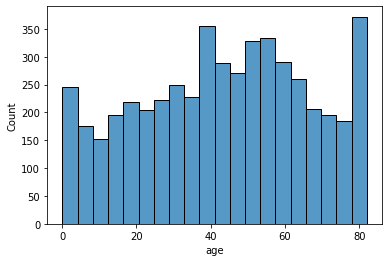

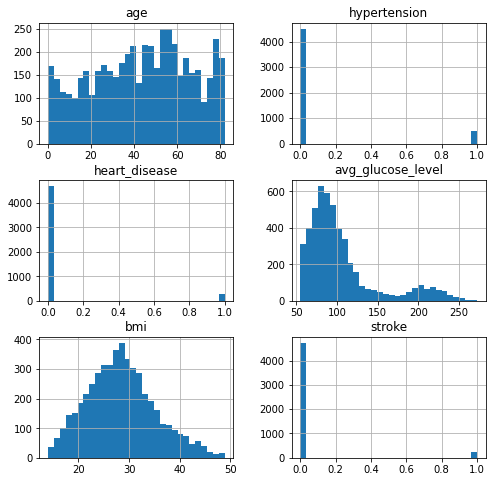

In [71]:
#Graph 1: 
sns.histplot(df.age)
df.hist(bins=30, figsize=(8,8))
plt.show()


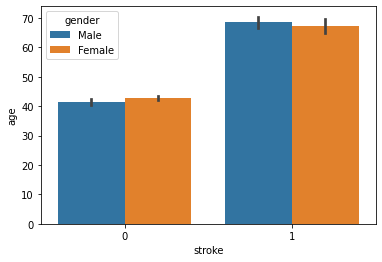

In [72]:
#Graph 2: 
sns.barplot(x='stroke', y='age', hue='gender', data=df)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


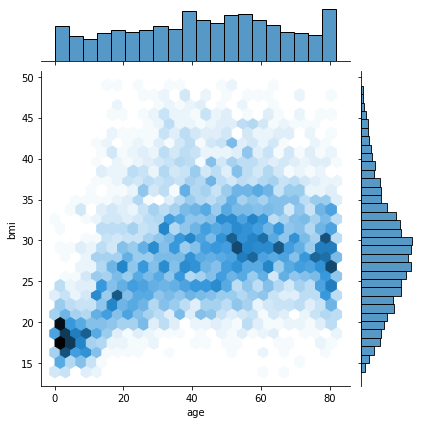

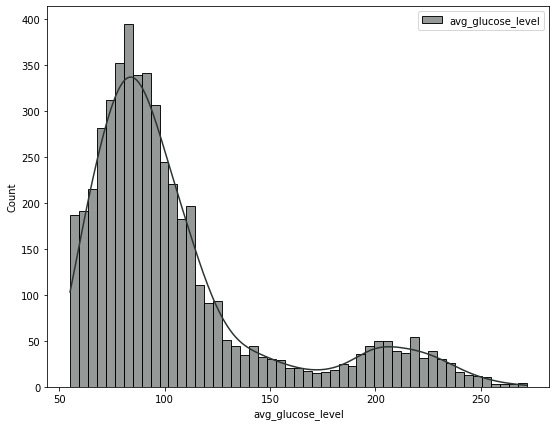

In [73]:
#with sns.axes_style('white'):
sns.jointplot("age", "bmi" , df, kind='hex')

#sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(9,7))
sns.histplot(df['avg_glucose_level'], color="#2C3532", label="avg_glucose_level", kde= True)
plt.legend()

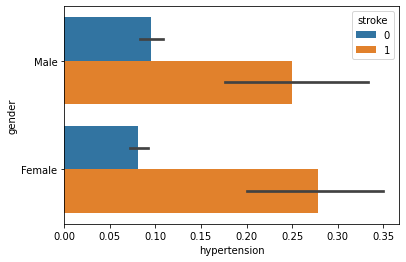

In [74]:
#Graph 3: 
sns.barplot(x='hypertension', y='gender', hue='stroke', data=df)
plt.show()


Observation: 
* Graph 1: This dataset is relatively homogeneous 
* Graph 2: The older an individual gets, the greater the risk of stroke (same for men and women)
* Graph 3: Men and women who have had a stroke, have high levels of hypertension. 

➔ It can be deduced that high hypertension is a factor in stroke.

In [75]:
#gender
# Hypertension
# heart_disease
# Married
# Work type 
# Residence Type
# Smoking

## 6) Bivariate Analysis ??

In [76]:
#fig = px.histogram(df, x="heart_disease", color="stroke",width=400, height=400)
#fig.show()

#sns.hist(x='heart_disease', y='gender', hue='stroke', data=df)
#plt.show()

## Other Exploratory Data Analysis

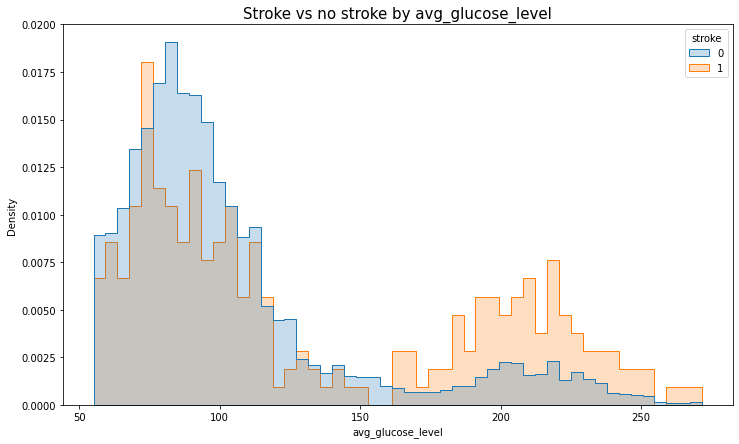

In [77]:
plt.figure(figsize=(12,7))
sns.histplot(
    df, x="avg_glucose_level", hue="stroke",
    element="step",
    stat="density", common_norm=False,
)
plt.title('Stroke vs no stroke by avg_glucose_level', fontsize=15)
plt.show()

*https://www.kaggle.com/code/ahmederaky/stroke-prediction-classification*

## Analysis and Conclusion (Lab 2.1)


With the above parameters, what possibly can the question be? 

Probably:

* Do patience hypertension status correspond with their strok status?
* Does a patient BMI affect the stroke status?
* Are patients that formerly smoked most likely to have stroke?
* Is the average blood glucose level and bmi also a criteria?

# LAB 2.2 : Normalization procedures - Data Processing

---
Data preparation
Cleaning
Integration
Transformation
Reduction
Discretization

---


A) Normalizing values
B) Discretization (binning)
C) Missing Values

- apply the ID3 Decision Tree learning algorithm – but this only works with categorical data. 
- We may want to apply a Neural Network, but this needs the data to be all numeric, and for all values to be relatively small (e.g. between -1 and 1).

Discuss how you fixed problems like missing values,
errors or outliers - if applicable. Did you need to apply any pre-processing or normalization procedures?
If so, why?

---
its just aplicable to **categorical** data, so there is no need to "normalize" what is already categorical. 

Although, the rest of **numerical data** should be **normalized**.

---




## A) Data Preprocessing

---
>B1) Dealing with Missing/Unknown values

> B2) Exploratory Data Analysis EDA (convert  categorical variables to numbers - Encode)

>B3) Normalizing - the rest of numerical data should be normalized

---

####B1) Dealing with Missing/Unknown values


In [78]:
df.isna()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4976,False,False,False,False,False,False,False,False,False,False,False
4977,False,False,False,False,False,False,False,False,False,False,False
4978,False,False,False,False,False,False,False,False,False,False,False
4979,False,False,False,False,False,False,False,False,False,False,False


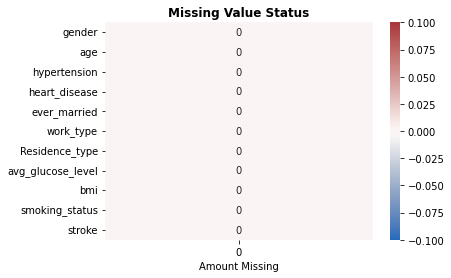

In [79]:
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(df.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.show()

In [80]:
df.info()
df.isnull().sum()  #no missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

####B2) Exploratory Data Analysis EDA :  
Convert  categorical variables to numbers --> Encoders
  > LabelEncoder.   --> 2 parameters 
- gender (Female, Male)
- ever_married (Yes, No)
- Residence_type (Rural, Urban)

  > OrdinalEncoder.  --> More than 2 parameters
  - work_type (Private, Self-employement, children, Govt_job) {work_type_Govt_job work_type_Private work_type_Self-employed work_type_children smoking_status_Unknown}
  - smoking_status (never smoked, Unknown, formerly smoked, smokes) {smoking_status_formerly smoked smoking_status_never smoked smoking_status_smokes}



*REMINDER*

---
**LabelBinarizer:** for converting bin_values(Yes or NO, True or Flase) into (0 & 1).

**LabelEncoder:**Used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.

**OrdinalEncoder:**In ordinal encoding, each unique category value is assigned an integer value.For example, “red” is 1, “green” is 2, and “blue” is 3.This is called an ordinal encoding or an integer encoding and is easily reversible. Often, integer values starting at zero are used.


In [81]:
df_uniques = df.nunique() 
df_uniques


gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [82]:
# 2 parameters : > Encoders
le = LabelEncoder()
df["gender"] = le.fit_transform(df["gender"])
df["ever_married"] = le.fit_transform(df["ever_married"])
df["Residence_type"] = le.fit_transform(df["Residence_type"])

In [83]:
# 2 parameters : > OrdinalEncoder
oe = OrdinalEncoder()
df[["work_type","smoking_status"]] = oe.fit_transform(df[["work_type","smoking_status"]])

In [84]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1.0,1,228.69,36.6,0.0,1
1,1,80.0,0,1,1,1.0,0,105.92,32.5,1.0,1
2,0,49.0,0,0,1,1.0,1,171.23,34.4,2.0,1
3,0,79.0,1,0,1,2.0,0,174.12,24.0,1.0,1
4,1,81.0,0,0,1,1.0,1,186.21,29.0,0.0,1


In [85]:
df.smoking_status.value_counts() 

1.0    1838
3.0    1500
0.0     867
2.0     776
Name: smoking_status, dtype: int64

In [86]:
df1 = pd.get_dummies(df, columns=["work_type", "smoking_status"])

###Data Preprocessing

In scaling, you're changing the range of your data, while
in normalization, you're changing the shape of the distribution of your data


> Scaling
2 techniques: 

-> min/max scaling 

-> Standardization scaling



In [87]:
std=StandardScaler()
columns = ['avg_glucose_level','bmi','age']
scaled = std.fit_transform(df[['avg_glucose_level','bmi','age']])
scaled = pd.DataFrame(scaled,columns=columns)
df=df.drop(columns=columns,axis=1)

In [88]:
df=df.merge(scaled, left_index=True, right_index=True, how = "left")
df

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,avg_glucose_level,bmi,age
0,1,0,1,1,1.0,1,0.0,1,2.723411,1.193238,1.040584
1,1,0,1,1,1.0,0,1.0,1,-0.000523,0.589390,1.614270
2,0,0,0,1,1.0,1,2.0,1,1.448529,0.869222,0.246250
3,0,1,0,1,2.0,0,1.0,1,1.512650,-0.662492,1.570141
4,1,0,0,1,1.0,1,0.0,1,1.780895,0.073909,1.658400
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,0,0,0,1.0,0,0.0,0,-0.794162,0.191733,-0.106788
4977,1,0,0,1,1.0,1,2.0,0,1.890500,0.383197,-0.150917
4978,0,1,0,1,0.0,0,2.0,0,-0.242364,0.486294,0.069731
4979,1,0,0,1,1.0,0,2.0,0,-0.488199,0.221189,-0.150917


# LAB 3 : Correlation

In [89]:
# Now we will look at the correlation of all the attributes with the expected class attribute (median-house-value)
corr_matrix = df.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes

In [90]:
#corr_matrix["age"].sort_values(ascending=False)
# Q6 Which are the most correlated attributes with the output variable(i.e.median house value)?
# Does that make sense? 

(0.0, 16.0, 0.0, 5500.0)

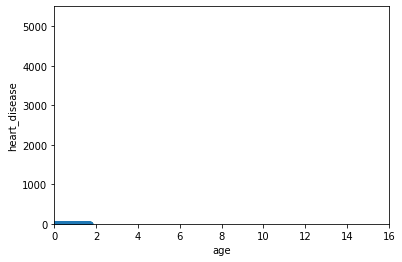

In [92]:
# let’s zoom in on the correlation scatterplot "median house value & the median income,"
df.plot(kind="scatter", x="age", y="heart_disease",
             alpha=0.1)
plt.axis([0, 16, 0, 5500])

In [ ]:
corr_matrix["age"].sort_values(ascending=False)
# Q6 Which are the most correlated attributes with the output variable(i.e.median house value)?
# Does that make sense? 

In [93]:
correlation=df.corr()

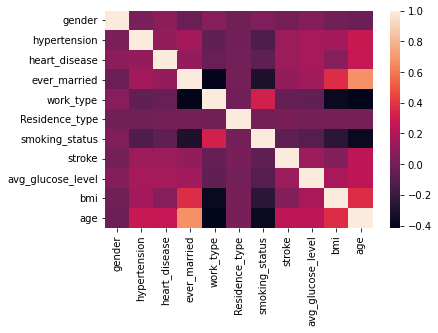

In [95]:
sns.heatmap(correlation,annot=False)

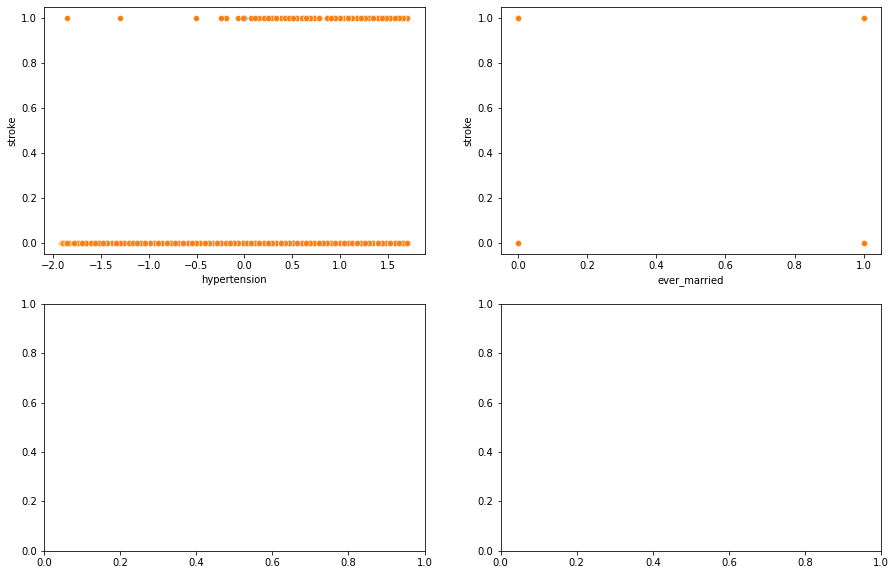

In [96]:
# correlation can be found out between continuous variables usir
fig,axis=plt.subplots(2,2,figsize=(15,10))
sns.scatterplot(x='hypertension', y= 'stroke', data=df, ax=axis [0,0])
sns.scatterplot(x='ever_married', y='stroke', data=df, ax=axis[0,1])
sns.scatterplot(x='age', y= 'stroke', data=df, ax=axis [0,0])
sns.scatterplot(x='ever_married', y='stroke', data=df, ax=axis[0,1])
plt.show()

**▶ Generate correlation matrix and scatter plot**

Find most correlated attributes to output label
• (optional for BSc but recommended for higher marks, mandatory for MSc) Experiment with various
feature selection (feature reduction) methods
• (optional, possibly for higher marks) Gain more confidence with using Computer Vision or high- dimensional real world data sets


# LAB 4 : Classification Testing and Evaluation


Do patience hypertension status correspond with their strok status?
Does a patient BMI affect the stroke status?
Are patients that formerly smoked most likely to have stroke?
Is the average blood glucose level and bmi also a criteria?


In [97]:
X = df.drop(['stroke'], axis=1).values 
y = df['stroke'].values

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [99]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3486, 10)
(3486,)
(1495, 10)
(1495,)


accuracy, TP rate, FP rate, precision, recall, F measure, the ROC area

## Random Forest

In [100]:
rf_c = RandomForestClassifier()
rf_c.fit(X_train, y_train)

RandomForestClassifier()

In [103]:
from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score

## Decision Tree

In [ ]:
from sklearn.metrics import f1_score
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)

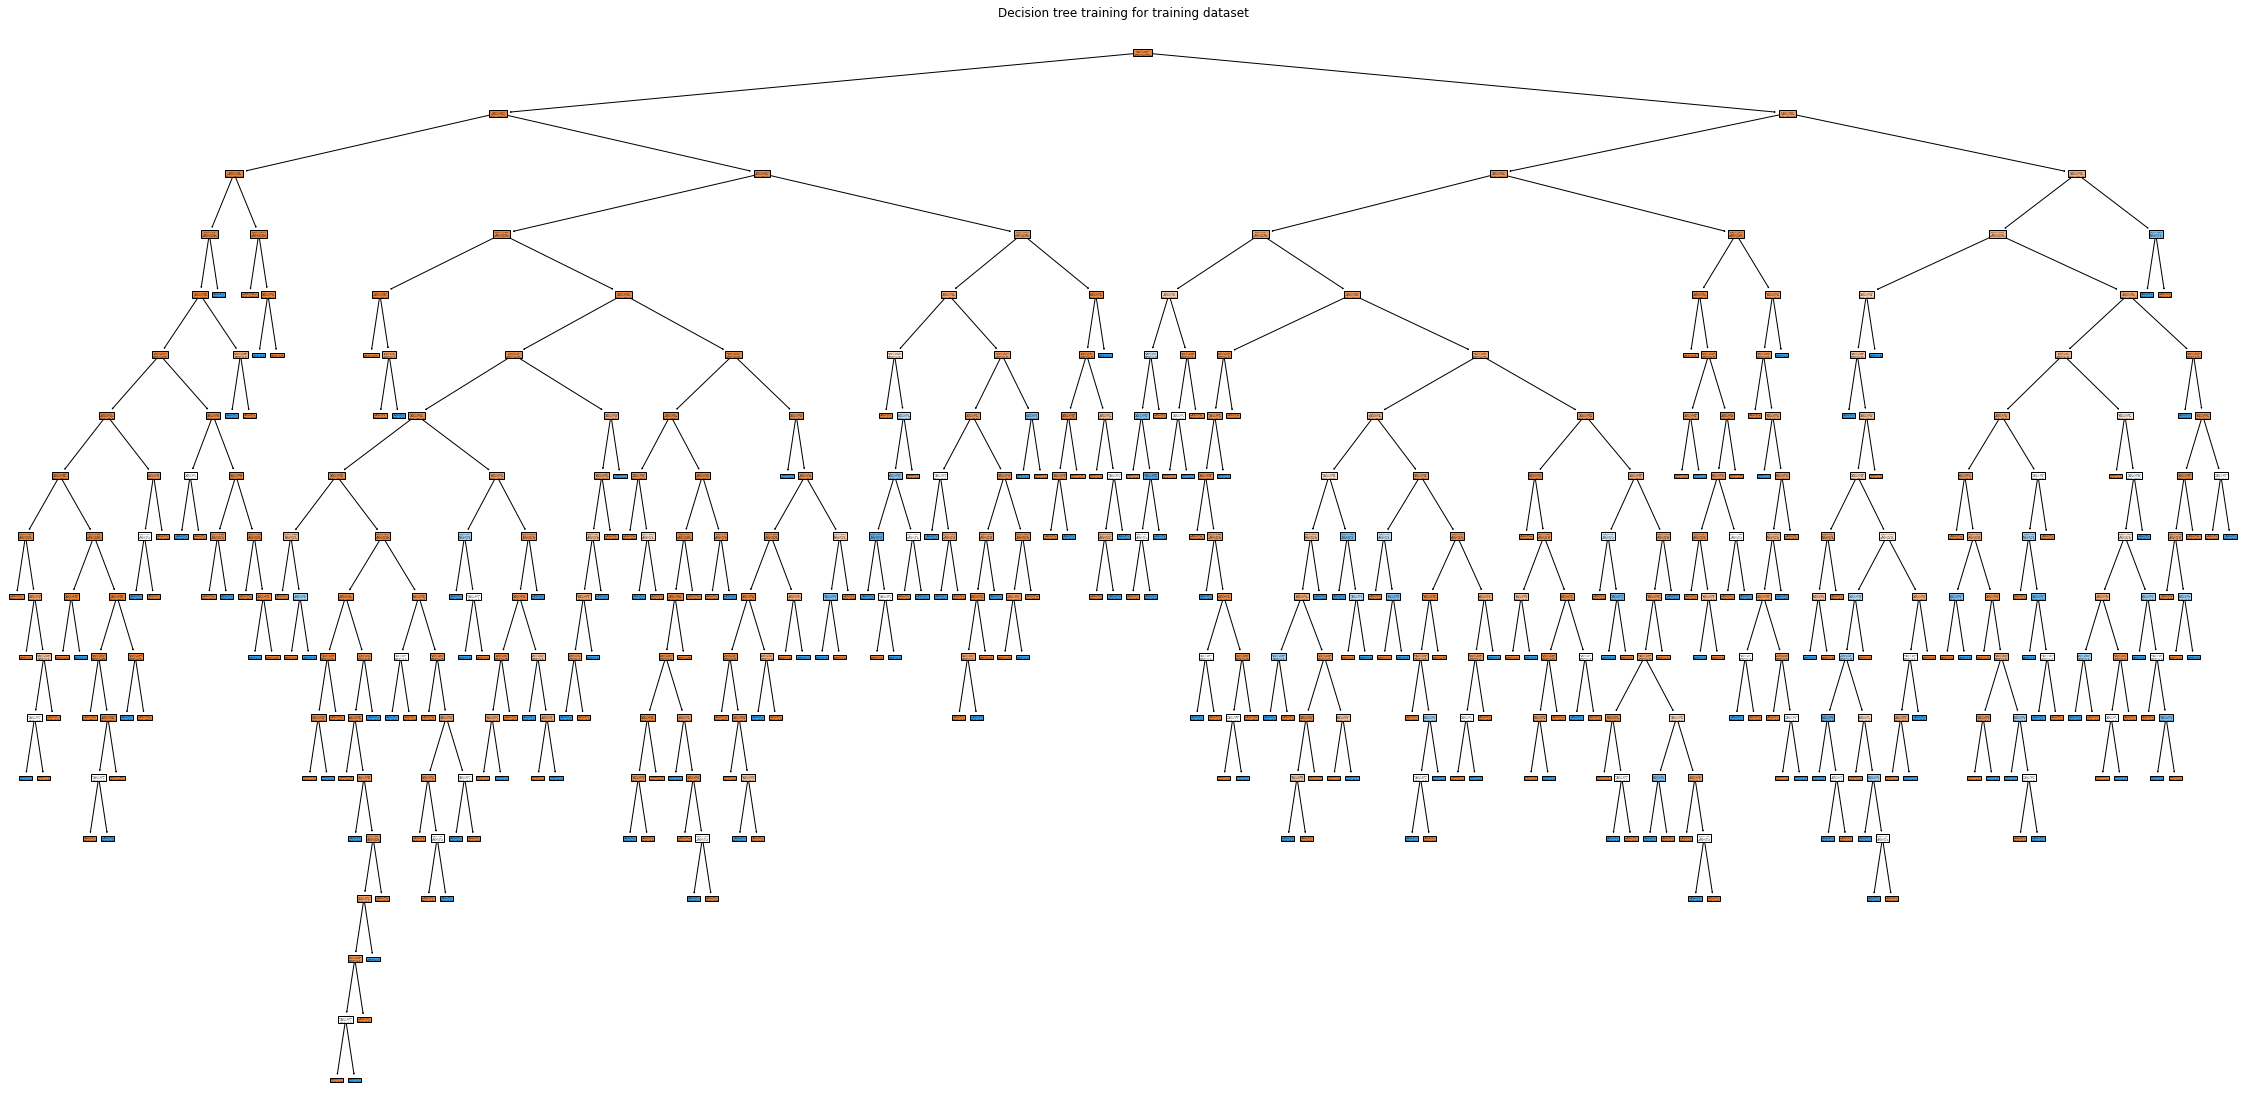

In [104]:
# importing the plot tree method
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()

# output size of decision tree
plt.figure(figsize=(40,20))

# providing the training dataset
clf = clf.fit(X_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree training for training dataset")
plt.show()

## Logistic Regression

In [106]:
model = LogisticRegression()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print('Testing Score \n',score)
logistic_score = model.score(X_train, y_train)
logistic_test = model.score(X_test, y_test)
#== 
y_pred= model.predict(X_test)
print(classification_report(y_test, y_pred))


Testing Score 
 0.9558528428093646
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1429
           1       0.00      0.00      0.00        66

    accuracy                           0.96      1495
   macro avg       0.48      0.50      0.49      1495
weighted avg       0.91      0.96      0.93      1495



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request 
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


#classification
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing, svm, neighbors
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Archit26/RiskAnalysis/main/german_credit_data.csv")
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [4]:
data.dtypes.value_counts()

object    6
int64     5
dtype: int64

# Data Cleaning

In [5]:
# First let's to checkout the missing values do we have on this dataframe and the we can decide to clean up (remove) them,
# or leave them !!!
missing_values = data.isnull().sum() # get the number of missing data points per column.
missing_values[:] # look at the whole missing points at all columns

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [6]:
# This time we do need to know the percentage %  of the mssing values in the dataset!!!

total_cells = np.product(data.shape) # returns the product of array elements over a given axis.
total_missing = missing_values.sum()
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

5.245454545454545


In [11]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [12]:
data.describe(include='object') # here by adding this argument (include='object') it allows us to look across the object(string) value

,Sex,Housing,Saving accounts,Checking account,Purpose,Risk
count,1000,1000,817,606,1000,1000
unique,2,3,4,3,8,2
top,male,own,little,little,car,good
freq,690,713,603,274,337,700


In [13]:
data1=data.dropna()

In [14]:
data1.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
7,35,male,3,rent,little,moderate,6948,36,car,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [15]:
data1.shape

(522, 10)

# Encoding

In [16]:
data_uniques = data1.nunique() 
# Count number of distinct elements in specified axis. 
#Return Series with number of distinct elements. Can ignore NaN values.
data_uniques

Age                  52
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       503
Duration             30
Purpose               8
Risk                  2
dtype: int64

In [17]:
binary_vals = list(data_uniques[data_uniques == 2].index) # Create alist for our bin_vales (composed of at least two values)
binary_vals

['Sex', 'Risk']

In [18]:
data1[binary_vals].dtypes # Check the datatypes in case if it needs to be encoded (converted into numaric values^_^)

Sex     object
Risk    object
dtype: object

In [19]:
categorical_vals  = list(data_uniques[(data_uniques > 2) & (data_uniques <=6)].index)
# This function allow us to determine how many categorical do we have actually those are more than 2 and less than 6
categorical_vals

['Job', 'Housing', 'Saving accounts', 'Checking account']

In [20]:
[[i, list(data1[i].unique())] for i in categorical_vals] 

[['Job', [2, 3, 1, 0]],
 ['Housing', ['own', 'free', 'rent']],
 ['Saving accounts', ['little', 'moderate', 'quite rich', 'rich']],
 ['Checking account', ['moderate', 'little', 'rich']]]

In [21]:
numaric_vals = list(set(data1.columns) - set(categorical_vals)- set(binary_vals))
# Extending the numaric values among cate_vals, dataframe columns and bin_values
numaric_vals

['Credit amount', 'Age', 'Duration', 'Purpose']

In [22]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder

In [23]:
lb, le, lo = LabelBinarizer(), LabelEncoder(), OrdinalEncoder()


In [24]:
for col in categorical_vals: 
  data1[col] = le.fit_transform(data1[col])

<ipython-input-24-1c9547632c99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[col] = le.fit_transform(data1[col])


In [25]:
for col in binary_vals:
  data1[col] = lb.fit_transform(data1[col])

<ipython-input-25-b4178e455932>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[col] = lb.fit_transform(data1[col])
<ipython-input-25-b4178e455932>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[col] = lb.fit_transform(data1[col])


In [26]:
data1.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,0,2,1,0,1,5951,48,radio/TV,0
3,45,1,2,0,0,0,7882,42,furniture/equipment,1
4,53,1,2,0,0,0,4870,24,car,0
7,35,1,3,2,0,1,6948,36,car,1
9,28,1,3,1,0,1,5234,30,car,0


In [27]:
data1.Risk.value_counts() 
# Return a Series containing counts of values in our Y (target) after encoding ,
# 1 refers to have Stroke & 0 refers to don't have Stroke

1    291
0    231
Name: Risk, dtype: int64

In [28]:
data1.drop(['Purpose'],axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [29]:
data1.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
1,22,0,2,1,0,1,5951,48,0
3,45,1,2,0,0,0,7882,42,1
4,53,1,2,0,0,0,4870,24,0
7,35,1,3,2,0,1,6948,36,1
9,28,1,3,1,0,1,5234,30,0


# Data Presentation

(array([231.,   0.,   0.,   0., 291.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 5 Patch objects>)

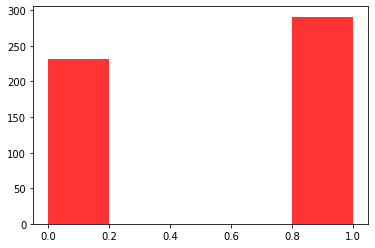

In [30]:
# create a histogram: 

ax = plt.axes()
ax.hist(data1.Risk, bins=5, alpha=0.8, color='red')

In [31]:
# Create Feature columns :
features_col = [x for x in data1.columns if x not in 'Risk']
features_col

['Age',
 'Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Credit amount',
 'Duration']

In [32]:
data1[features_col]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
1,22,0,2,1,0,1,5951,48
3,45,1,2,0,0,0,7882,42
4,53,1,2,0,0,0,4870,24
7,35,1,3,2,0,1,6948,36
9,28,1,3,1,0,1,5234,30
...,...,...,...,...,...,...,...,...
989,48,1,1,1,0,1,1743,24
993,30,1,3,1,0,0,3959,36
996,40,1,3,1,0,0,3857,30
998,23,1,2,0,0,0,1845,45


# Train and Test Dataset

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train, x_test, y_train, y_test = train_test_split(data1[features_col], data1['Risk'])

# Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier 

In [55]:
# Creating the model 
tree_model = DecisionTreeClassifier(random_state=12)

In [57]:
# giving data to model
tree_model = tree_model.fit(x_train, y_train)

In [58]:
# Determine the number of nodes and maximum depth:
tree_model.tree_.node_count, tree_model.tree_.max_depth

(217, 15)

# Error Metrice

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [39]:
def measure_error(y_true, y_pred, label):
  return pd.Series({'accuracy': accuracy_score(y_true, y_pred),
                    'precision': precision_score(y_true, y_pred),
                    'recall': recall_score(y_true, y_pred),
                    'f1': f1_score(y_true, y_pred)},
                   name=label)

In [ ]:
y_train_pred = tree_model.predict(x_train)

In [ ]:
y_test_pred = tree_model.predict(x_test)

# Confusion Matrix

In [61]:
# importing standard scalling method from sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [62]:
# importing the required modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix in graph
cm = confusion_matrix(y_test,y_pred, labels=classifer.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifer.classes_)
disp.plot()

# showing the matrix
plt.show()

NameError: ignored

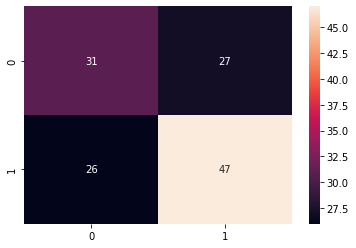

In [63]:
# providing the inputs for the scalling purpose
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

# importing decision tree algorithm
from sklearn.tree import DecisionTreeClassifier

# entropy means information gain
classifer=DecisionTreeClassifier(criterion='entropy', random_state=0)

# providing the training dataset
classifer.fit(X_train,y_train)
y_pred= classifer.predict(X_test)

# creating confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

# Making the Confusion Matrix
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm,annot=True)
plt.savefig('confusion.png')

# Confusion Matrix by Binary Classification

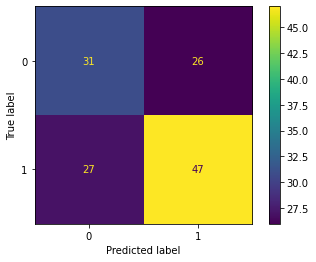

In [64]:
# importing the required modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix in graph
cm = confusion_matrix(y_test,y_pred, labels=classifer.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifer.classes_)
disp.plot()

# showing the matrix
plt.show()

## Precision Score

In [65]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_test,y_pred)

0.6438356164383562

## Recall Score

In [66]:
recall_score(y_test,y_pred)

0.6351351351351351

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5954198473282443

# ROC

In [68]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

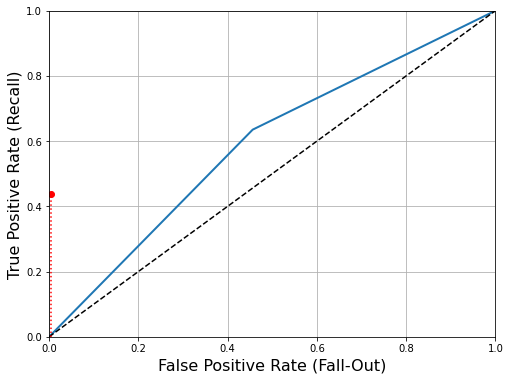

In [69]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

In [70]:
# Roc Score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.589497392128971

# 10 FOLD CROSS VALIDATION

In [71]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression as lrcv
from sklearn.metrics import roc_auc_score

In [72]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Accuracy: 0.611 (0.073)
0.61 accuracy with a standard deviation of 0.07


# TRAINING AND TESTING DATA OF DECISION TREE


Depth & leaf nodes =  2
accuracy of Decision Tree =  0.5954198473282443
ROC of Decision Tree =  0.589497392128971

Depth & leaf nodes =  3
accuracy of Decision Tree =  0.5954198473282443
ROC of Decision Tree =  0.589497392128971

Depth & leaf nodes =  4
accuracy of Decision Tree =  0.5954198473282443
ROC of Decision Tree =  0.589497392128971

Depth & leaf nodes =  5
accuracy of Decision Tree =  0.5954198473282443
ROC of Decision Tree =  0.589497392128971

Depth & leaf nodes =  6
accuracy of Decision Tree =  0.5954198473282443
ROC of Decision Tree =  0.589497392128971

Depth & leaf nodes =  7
accuracy of Decision Tree =  0.5954198473282443
ROC of Decision Tree =  0.589497392128971


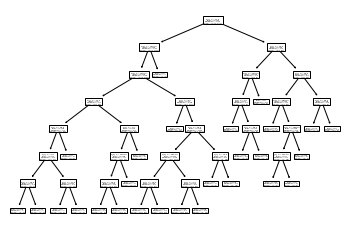

In [73]:
for i in range(2, 8):
    tree_clf = DecisionTreeClassifier(max_depth=i, min_samples_leaf=i, splitter="best", random_state=42)
    tree_clf.fit(x_train, y_train)
    plot_tree(tree_clf);
    print("")
    res_pred = tree_clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Depth & leaf nodes = ", i)
    print("accuracy of Decision Tree = ",accuracy)
    #Precision, recall, f1-score
    #print(cm.classification_report(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC of Decision Tree = ",roc_auc)

# NEW DATASET WITH 30% IN TEST CASE

In [74]:
nX_train, nX_test, ny_train, ny_test = train_test_split(X_train, y_train, test_size=0.30, random_state=42)
res_pred = tree_clf.predict(nX_test)
accuracy_score(ny_test, res_pred)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.5423728813559322

# NEW DATASET WITH 60% IN TEST CASE

In [75]:
nX_train, nX_test, ny_train, ny_test = train_test_split(X_train, y_train, test_size=0.60, random_state=42)
res_pred = tree_clf.predict(nX_test)
accuracy_score(ny_test, res_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.548936170212766

In [76]:
x_train.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
199,40,1,3,1,0,1,4297,18
759,35,1,2,1,0,0,691,12
950,40,1,0,1,0,1,3590,18
917,68,1,3,1,0,0,14896,6
43,24,1,2,2,1,0,6187,30


## MultinomialNB

In [77]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(alpha=0.0, class_prior=[0.4, 0.6])
model.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


MultinomialNB(alpha=0.0, class_prior=[0.4, 0.6])

In [78]:
predict = model.predict(x_test)
predict

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0])

In [80]:
test_score = model.score(x_test, y_test)
print("MultinomialNB Score:", test_score)

MultinomialNB Score: 0.6030534351145038


In [81]:
train_score = model.score(x_train, y_train)
print("MultinomialNB Score:",train_score)

MultinomialNB Score: 0.5959079283887468


In [82]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, x_train, y_train, cv=5 )
cv_results

/usr/local/lib/python3.8/dist-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


{'fit_time': array([0.01093674, 0.00306129, 0.00282407, 0.00269246, 0.00255919]),
 'score_time': array([0.00184345, 0.001616  , 0.00144315, 0.0014112 , 0.00208378]),
 'test_score': array([0.70886076, 0.51282051, 0.53846154, 0.61538462, 0.53846154])}

In [83]:
conf_mtr = pd.crosstab(y_test, predict)
conf_mtr

col_0,0,1
Risk,,
0,28,29
1,23,51


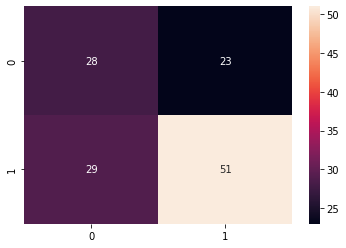

In [84]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict)

# Making the Conffusion Matrix
cm = confusion_matrix(predict, y_test)
sns.heatmap(cm,annot=True)
plt.savefig('confusion.png')

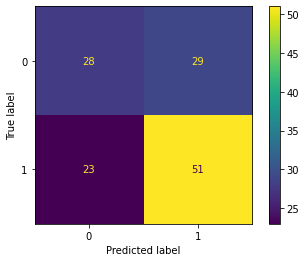

In [85]:
# importing the required modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix in graph
cm = confusion_matrix(y_test,predict, labels=classifer.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifer.classes_)
disp.plot()

# showing the matrix
plt.show()

In [86]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_test,predict)

0.6375

In [87]:
recall_score(y_test,predict)

0.6891891891891891

In [88]:
f1_score(y_test,predict)

0.6623376623376622

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)

0.6030534351145038

In [90]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict)

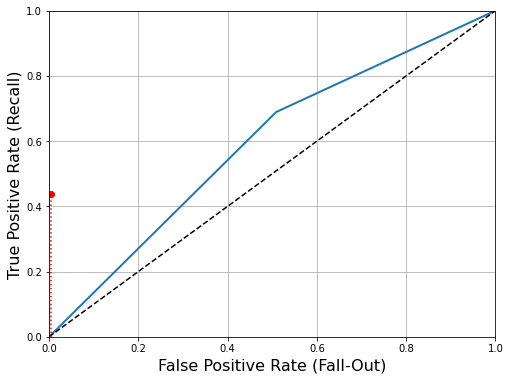

In [91]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

In [79]:
test_score = model.score(x_test, y_test)
print("MultinomialNB Score:", test_score)

MultinomialNB Score: 0.6030534351145038


# Acuracy Score

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

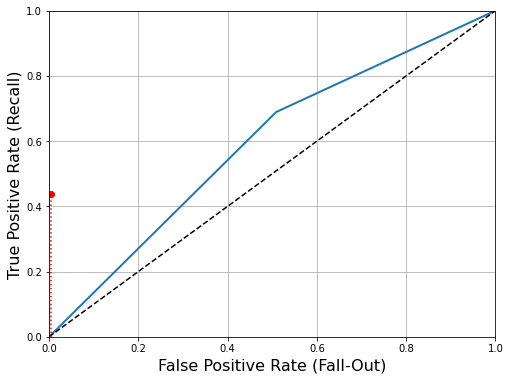

In [93]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

## GAUSIAN NB

In [94]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [95]:
predict = model.predict(x_test)
predict

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0])

In [96]:
test_score = model.score(x_test, y_test)
print("GaussianNB Score:", test_score)

GaussianNB Score: 0.5877862595419847


In [97]:
train_score = model.score(x_train, y_train)
print("GaussianNB Score:",train_score)

GaussianNB Score: 0.639386189258312


In [98]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, x_train, y_train, cv=5 )
cv_results

{'fit_time': array([0.00413895, 0.00331116, 0.00219893, 0.00211191, 0.00205469]),
 'score_time': array([0.00497055, 0.00173664, 0.00146317, 0.00146031, 0.00144768]),
 'test_score': array([0.6835443 , 0.6025641 , 0.61538462, 0.62820513, 0.64102564])}

In [99]:
conf_mtr = pd.crosstab(y_test, predict)
conf_mtr

col_0,0,1
Risk,,
0,21,36
1,18,56


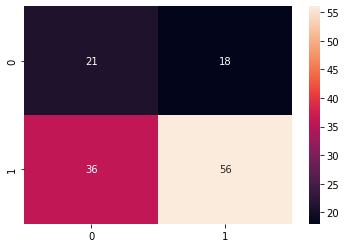

In [100]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict)

# Making the Confusion Matrix
cm = confusion_matrix(predict, y_test)
sns.heatmap(cm,annot=True)
plt.savefig('confusion.png')

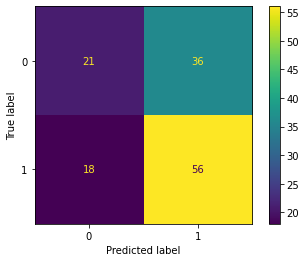

In [101]:
# importing the required modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix in graph
cm = confusion_matrix(y_test,predict, labels=classifer.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifer.classes_)
disp.plot()

# showing the matrix
plt.show()

In [102]:
# Roc Score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predict)

0.5625889046941679

##lab 9

## Logistic Regression

In [103]:
classifier = lrcv

In [104]:
xtrain = data1.drop(['Risk'], axis = 1)
xtrain.head()
ytrain = data1['Risk']
ytrain.head()
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(xtrain,ytrain)

In [105]:
x_train.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
444,30,0,3,1,0,1,5096,48
510,26,1,2,1,0,0,759,12
154,36,1,3,2,1,1,6967,24
653,42,1,3,1,1,1,8086,36
692,29,1,2,1,1,1,2896,24


In [106]:
model = lrcv(C=1000000.)
model = model.fit(x_train,y_train)

In [107]:
print('coef', model.coef_)
print('intercept', model.intercept_)

coef [[ 7.47782433e-03  3.81188854e-01  8.01983144e-02  1.26323542e-01
   2.79257954e-01  4.05285203e-01  7.25639894e-05 -6.66685583e-02]]
intercept [0.19008011]


In [108]:
zipped = list(zip(x_train,y_train))

In [109]:
df = pd.DataFrame(zipped,columns = [features_col ,'Risk'])

In [110]:
from patsy import dmatrices
y_train, x_train = dmatrices('Risk ~ features_col',
                  df, return_type="dataframe")

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


In [111]:
print(x_train)

   Intercept  features_col[T.Checking account]  features_col[T.Credit amount]  \
0        1.0                               0.0                            0.0   
1        1.0                               0.0                            0.0   
2        1.0                               0.0                            0.0   
3        1.0                               0.0                            0.0   
4        1.0                               0.0                            0.0   
5        1.0                               1.0                            0.0   
6        1.0                               0.0                            1.0   
7        1.0                               0.0                            0.0   

   features_col[T.Duration]  features_col[T.Housing]  features_col[T.Job]  \
0                       0.0                      0.0                  0.0   
1                       0.0                      0.0                  0.0   
2                       0.0            

In [112]:
y_train = np.ravel(y_train)

In [113]:
model = lrcv(C=100000, fit_intercept=False)
model = model.fit(x_train,y_train)
print(pd.DataFrame(np.transpose(model.coef_),x_train.columns))

                                          0
Intercept                         -7.494496
features_col[T.Checking account]  -3.397873
features_col[T.Credit amount]     16.208745
features_col[T.Duration]          -3.397873
features_col[T.Housing]           -3.397873
features_col[T.Job]               16.208745
features_col[T.Saving accounts]   16.208745
features_col[T.Sex]               -3.397873


In [114]:
model.predict_proba(x_train)#Evaluate the Model

array([[9.99444172e-01, 5.55828062e-04],
       [9.99981401e-01, 1.85992961e-05],
       [1.64201893e-04, 9.99835798e-01],
       [9.99981401e-01, 1.85992961e-05],
       [1.64201893e-04, 9.99835798e-01],
       [9.99981401e-01, 1.85992961e-05],
       [1.64201893e-04, 9.99835798e-01],
       [9.99981401e-01, 1.85992961e-05]])

## linear Regression

In [115]:
from sklearn.linear_model import LinearRegression 

In [116]:
xtrain = data1.drop(['Risk'], axis = 1)
xtrain.head()
ytrain = data1['Risk']
ytrain.head()
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(xtrain,ytrain)

In [117]:
model = LinearRegression()

In [118]:
model.fit(x_train, y_train)

LinearRegression()

In [119]:
r_sq = model.score(x_train, y_train)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.10596945995677709


In [120]:
print(f"intercept: {model.intercept_}")


intercept: 0.5329030469738382


In [121]:
print(f"slope: {model.coef_}")

slope: [ 2.42549761e-03  7.63802157e-02  1.80320013e-02  1.54816817e-03
  6.27424929e-02  8.81494934e-02 -5.29736781e-06 -1.00802592e-02]


In [122]:
y_pred = model.predict(x_test)
print(f"predicted response:\n{y_pred}")

predicted response:
[0.37753375 0.64033326 0.68604728 0.71079548 0.58333954 0.54250514
 0.52945665 0.66432042 0.32233414 0.68810042 0.7269538  0.50585833
 0.12605359 0.42308426 0.13724408 0.59961342 0.47692381 0.4342556
 0.50630364 0.43850759 0.1535927  0.62879985 0.50352428 0.43421545
 0.44015306 0.58415932 0.5898975  0.58985239 0.63361434 0.13944363
 0.5310883  0.53924108 0.24027426 0.66644514 0.62489316 0.40986504
 0.46312065 0.67561169 0.48850462 0.7161162  0.53584839 0.35523039
 0.57601092 0.10680507 0.58227728 0.17521974 0.64962722 0.57186884
 0.23953008 0.67278622 0.40449162 0.60284499 0.71557772 0.78179784
 0.24847143 0.4532548  0.37365626 0.59458393 0.68081397 0.47231884
 0.20154223 0.31269659 0.62958938 0.56883419 0.64962393 0.68334346
 0.61085945 0.73674283 0.50191677 0.39782574 0.46867848 0.48134122
 0.90809913 0.20843363 0.32713862 0.54809109 0.72059753 0.88636087
 0.72741015 0.38542344 0.75598    0.22395858 0.70291568 0.36425807
 0.70027143 0.52138875 0.66438334 0.2634379

In [123]:
# test classification dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


In [124]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = Perceptron()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.847 (0.052)


In [125]:
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = Perceptron()
# fit model
model.fit(X, y)
# define new data
row = [0.12777556,-3.64400522,-2.23268854,-1.82114386,1.75466361,0.1243966,1.03397657,2.35822076,1.01001752,0.56768485]
# make a prediction
yhat = model.predict([row])
# summarize prediction
print('Predicted Class: %d' % yhat)

Predicted Class: 1


In [126]:
# define grid
grid = dict()
grid['eta0'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

In [127]:
# grid search learning rate for the perceptron
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = Perceptron()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['eta0'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

Mean Accuracy: 0.857
Config: {'eta0': 0.0001}
>0.857 with: {'eta0': 0.0001}
>0.857 with: {'eta0': 0.001}
>0.853 with: {'eta0': 0.01}
>0.847 with: {'eta0': 0.1}
>0.847 with: {'eta0': 1.0}


In [128]:
grid = dict()
grid['max_iter'] = [1, 10, 100, 1000, 10000]

In [129]:
model = Perceptron(eta0=0.0001)

In [130]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = Perceptron(eta0=0.0001)
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['max_iter'] = [1, 10, 100, 1000, 10000]
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

Mean Accuracy: 0.857
Config: {'max_iter': 10}
>0.850 with: {'max_iter': 1}
>0.857 with: {'max_iter': 10}
>0.857 with: {'max_iter': 100}
>0.857 with: {'max_iter': 1000}
>0.857 with: {'max_iter': 10000}


In [131]:
 #Import the library for MLP
 from sklearn import datasets
 from sklearn import metrics
 from sklearn.neural_network import MLPClassifier
 from sklearn.neural_network import MLPRegressor
 from sklearn.model_selection import train_test_split
 import matplotlib.pyplot as plt
 import seaborn as sns

 plt.style.use('ggplot')

In [134]:
#Setting up the Data for Classifier
 dataset = datasets.load_wine()
 X = dataset.data; y = dataset.target
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

IndentationError: ignored

In [132]:
#Using MLP Classifier and calculating the scores  
model = MLPClassifier()
model.fit(X_train, y_train)
print(model)

expected_y  = y_test
predicted_y = model.predict(X_test)

MLPClassifier()


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [135]:
 #Now We are calcutaing other scores for the model using classification_report and confusion matrix by passing expected and predicted values of target of test set.
 print(metrics.classification_report(expected_y, predicted_y))
 print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.50      0.44      0.47        59
           1       0.58      0.64      0.61        72

    accuracy                           0.55       131
   macro avg       0.54      0.54      0.54       131
weighted avg       0.55      0.55      0.55       131

[[26 33]
 [26 46]]


In [136]:
#Setting up the Data for Regressor
dataset = datasets.load_boston()
X = dataset.data; y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [137]:
#Using MLP Regressor and calculating the scores
model = MLPRegressor()
model.fit(X_train, y_train)
print(model)

expected_y  = y_test
predicted_y = model.predict(X_test)

MLPRegressor()


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [138]:
#Using MLP Regressor and calculating the scores
model = MLPRegressor()
model.fit(X_train, y_train)
print(model)

expected_y  = y_test
predicted_y = model.predict(X_test)

MLPRegressor()


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


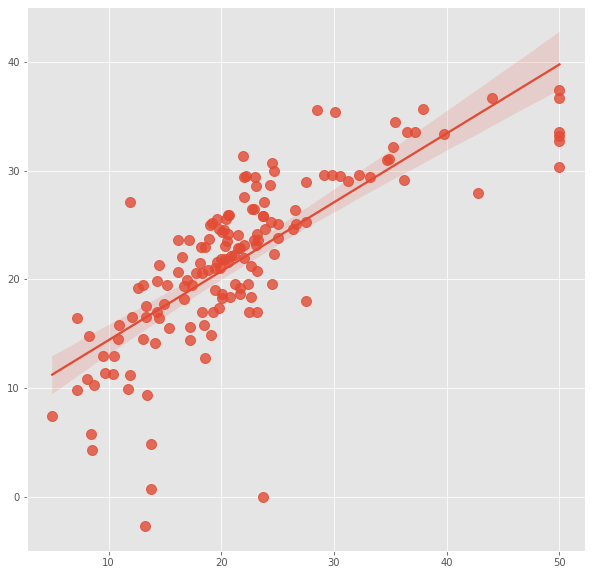

In [140]:
 #Ploting the model
 plt.figure(figsize=(10,10))
 sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})


In [141]:
#Evaluation of the model
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,beta_2=0.999, early_stopping=False, epsilon=1e-08,hidden_layer_sizes=(100,), learning_rate='constant',
  learning_rate_init=0.001, max_iter=200, momentum=0.9,n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,random_state=None, shuffle=True, solver='adam', tol=0.0001,validation_fraction=0.1, verbose=False, warm_start=False)

MLPClassifier()

In [142]:
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
beta_2=0.999, early_stopping=False, epsilon=1e-08,
hidden_layer_sizes=(100,), learning_rate='constant',
learning_rate_init=0.001, max_iter=200, momentum=0.9,
n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
random_state=None, shuffle=True, solver='adam', tol=0.0001,
validation_fraction=0.1, verbose=False, warm_start=False)


MLPRegressor()